In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings (`aNYC).csv')

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City Name
0,2595,https://www.airbnb.com/rooms/2595,2.020000e+13,08/09/2020,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,9.0,NaN,f,2,2,0,0,0.37,NYC
1,3831,https://www.airbnb.com/rooms/3831,2.020000e+13,08/09/2020,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,9.0,NaN,f,1,1,0,0,4.82,NYC
2,5121,https://www.airbnb.com/rooms/5121,2.020000e+13,08/09/2020,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,9.0,9.0,NaN,f,1,0,1,0,0.36,NYC
3,5136,https://www.airbnb.com/rooms/5136,2.020000e+13,09/09/2020,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/a3f7ace8-e7a9...,7378,https://www.airbnb.com/users/show/7378,...,8.0,10.0,NaN,f,1,1,0,0,0.01,NYC
4,5178,https://www.airbnb.com/rooms/5178,2.020000e+13,08/09/2020,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,10.0,9.0,NaN,f,1,0,1,0,3.42,NYC


## To analyse if the listing demand in the city of New York since 2009 through the years so that seasonality can be understood. Also, to establish and investigate relationship between demand and price.
## Answer if demand is one of the reasons for price fluctuation and if there is any correlation between dependent price factor and independent demand factor.

In [4]:
df.shape

(45756, 75)

In [5]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
City Name                                        object
Length: 75, dtype: object



## How many listings were made in time interval?

### Host Since (Column)

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [7]:
seas =df[['host_since','host_location','price','room_type','bedrooms','host_listings_count','host_total_listings_count','host_verifications']]

In [8]:
seas.head()

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications
0,09/09/2008,"New York, New York, United States",$175.00,Entire home/apt,NaN,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm..."
1,07/12/2008,"New York, New York, United States",$76.00,Entire home/apt,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm..."
2,03/02/2009,"New York, New York, United States",$60.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off..."
3,03/02/2009,"New York, New York, United States",$175.00,Entire home/apt,2.0,1.0,1.0,"['email', 'phone', 'reviews']"
4,03/03/2009,"New York, New York, United States",$79.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']"


In [9]:
seas.dtypes

host_since                    object
host_location                 object
price                         object
room_type                     object
bedrooms                     float64
host_listings_count          float64
host_total_listings_count    float64
host_verifications            object
dtype: object

In [10]:
seas.shape

(45756, 8)

## Extracting null values

In [11]:
seas.isnull().sum()

host_since                     14
host_location                 139
price                           0
room_type                       0
bedrooms                     4407
host_listings_count            14
host_total_listings_count      14
host_verifications              0
dtype: int64

## columns which has null values

In [13]:
vars_with_na = [var for var in seas.columns if seas[var].isnull().sum() > 0]
vars_with_na

['host_since',
 'host_location',
 'bedrooms',
 'host_listings_count',
 'host_total_listings_count']

In [14]:
seas=seas.dropna()

In [15]:
seas

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications
1,07/12/2008,"New York, New York, United States",$76.00,Entire home/apt,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm..."
2,03/02/2009,"New York, New York, United States",$60.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off..."
3,03/02/2009,"New York, New York, United States",$175.00,Entire home/apt,2.0,1.0,1.0,"['email', 'phone', 'reviews']"
4,03/03/2009,"New York, New York, United States",$79.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']"
5,05/02/2009,"New York, New York, United States",$75.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi..."
...,...,...,...,...,...,...,...,...
45750,08/07/2015,"Brooklyn, New York, United States",$55.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba..."
45751,29/10/2019,US,$53.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen..."
45752,26/06/2016,"New York, New York, United States",$79.00,Private room,1.0,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum..."
45753,29/10/2019,US,$70.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen..."


## Converting column to datetime

In [16]:
seas.host_since=pd.to_datetime(seas['host_since'], format='%d/%m/%Y')

In [17]:
seas.dtypes

host_since                   datetime64[ns]
host_location                        object
price                                object
room_type                            object
bedrooms                            float64
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
dtype: object

In [18]:
seas['Date'] = seas['host_since'].dt.date
seas['Day'] = seas['host_since'].dt.day
seas['Month'] = seas['host_since'].dt.month
seas['week'] =seas['host_since'].dt.week
seas['year'] =seas['host_since'].dt.year

In [19]:
seas.head()

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications,Date,Day,Month,week,year
1,2008-12-07,"New York, New York, United States",$76.00,Entire home/apt,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",2008-12-07,7,12,49,2008
2,2009-02-03,"New York, New York, United States",$60.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",2009-02-03,3,2,6,2009
3,2009-02-03,"New York, New York, United States",$175.00,Entire home/apt,2.0,1.0,1.0,"['email', 'phone', 'reviews']",2009-02-03,3,2,6,2009
4,2009-03-03,"New York, New York, United States",$79.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",2009-03-03,3,3,10,2009
5,2009-02-05,"New York, New York, United States",$75.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",2009-02-05,5,2,6,2009


In [20]:
seas['price']

1         $76.00
2         $60.00
3        $175.00
4         $79.00
5         $75.00
          ...   
45750     $55.00
45751     $53.00
45752     $79.00
45753     $70.00
45754     $59.00
Name: price, Length: 41223, dtype: object

## replacing symbol

In [21]:
seas['price'] = seas['price'].str.replace('$', '')

In [22]:
seas['price']

1         76.00
2         60.00
3        175.00
4         79.00
5         75.00
          ...  
45750     55.00
45751     53.00
45752     79.00
45753     70.00
45754     59.00
Name: price, Length: 41223, dtype: object

In [23]:
seas['price'] = seas['price'].str.replace(',', '')

In [24]:
seas['price'] = seas['price'].astype(float)

In [25]:
seas.dtypes

host_since                   datetime64[ns]
host_location                        object
price                               float64
room_type                            object
bedrooms                            float64
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
Date                                 object
Day                                   int64
Month                                 int64
week                                  int64
year                                  int64
dtype: object

# Data Analysis

In [26]:
seas['price'].max()

10000.0

In [27]:
seas[seas['price'] == 10000]

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications,Date,Day,Month,week,year
14458,2013-02-19,"New York, New York, United States",10000.0,Entire home/apt,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",2013-02-19,19,2,8,2013
14502,2016-02-12,"New York, New York, United States",10000.0,Entire home/apt,2.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",2016-02-12,12,2,6,2016
23192,2016-05-16,"New York, New York, United States",10000.0,Entire home/apt,1.0,1.0,1.0,['phone'],2016-05-16,16,5,20,2016
30386,2018-02-07,"New York, New York, United States",10000.0,Shared room,1.0,1.0,1.0,"['email', 'phone']",2018-02-07,7,2,6,2018
37257,2018-10-12,"New York, New York, United States",10000.0,Private room,1.0,11.0,11.0,"['email', 'phone']",2018-10-12,12,10,41,2018
37883,2019-06-06,US,10000.0,Private room,1.0,4.0,4.0,"['email', 'phone', 'work_email']",2019-06-06,6,6,23,2019


In [28]:
seas['price'].min()

0.0

In [29]:
seas[seas['price'] == 0.0]

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications,Date,Day,Month,week,year
36601,2019-09-05,US,0.0,Private room,1.0,5.0,5.0,['phone'],2019-09-05,5,9,36,2019
36602,2019-09-05,US,0.0,Private room,1.0,5.0,5.0,['phone'],2019-09-05,5,9,36,2019
36604,2019-09-05,US,0.0,Private room,1.0,5.0,5.0,['phone'],2019-09-05,5,9,36,2019
36605,2019-09-05,US,0.0,Private room,1.0,5.0,5.0,['phone'],2019-09-05,5,9,36,2019


In [30]:
yearcoun=seas['year'].value_counts()

## Airbnb per year listing

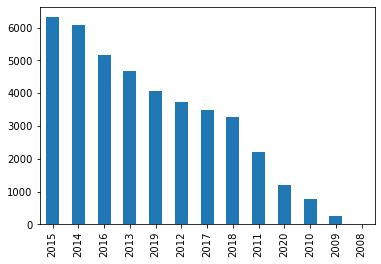

In [31]:
seas['year'].value_counts().plot(kind = 'bar')

## Airbnb per month listing

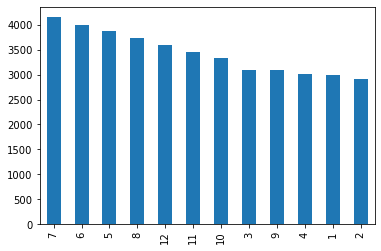

In [33]:
seas['Month'].value_counts().plot(kind='bar')

## Airbnb per day listing

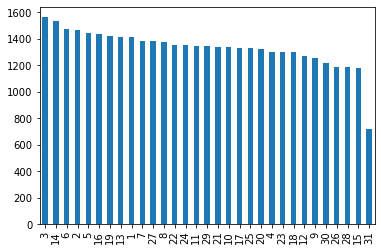

In [34]:
seas['Day'].value_counts().plot(kind='bar')

## Grouping total price per year

In [35]:
yeapri=seas[['year','price']].groupby('year').sum().reset_index()

## value count of room types

In [37]:
seas['room_type'].value_counts()

Private room       20268
Entire home/apt    19681
Shared room          941
Hotel room           333
Name: room_type, dtype: int64

## Descriptive analysis

In [38]:
seas[['room_type','price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,209.858187
Hotel room,334.393844
Private room,89.774502
Shared room,89.118757


In [39]:
seas[seas['room_type'] =='Hotel room'].price.max()

2229.0

In [40]:
seas[(seas['room_type'] == 'Hotel room') & (seas['price'] == 2229)]

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications,Date,Day,Month,week,year
32863,2019-05-13,"New York, New York, United States",2229.0,Hotel room,1.0,9.0,9.0,['phone'],2019-05-13,13,5,20,2019


In [41]:
seas[['room_type','price']].groupby('room_type').sum()

,price
room_type,
Entire home/apt,4130218.97
Hotel room,111353.15
Private room,1819549.60
Shared room,83860.75


## Analysis for Entire home/apt

In [43]:
entir=seas[seas['room_type'] == 'Entire home/apt']

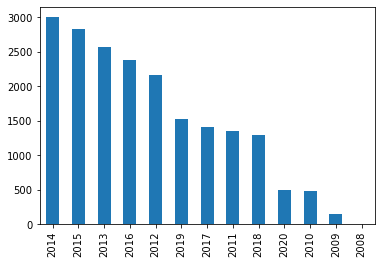

In [44]:
entir['year'].value_counts().plot(kind='bar')

In [46]:
seas[seas['year'] == 2008]

,host_since,host_location,price,room_type,bedrooms,host_listings_count,host_total_listings_count,host_verifications,Date,Day,Month,week,year
1,2008-12-07,"New York, New York, United States",76.00,Entire home/apt,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",2008-12-07,7,12,49,2008
50,2008-11-19,"New York, New York, United States",79.00,Private room,1.0,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",2008-11-19,19,11,47,2008
537,2008-10-14,"New York, New York, United States",96.00,Entire home/apt,1.0,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",2008-10-14,14,10,42,2008
1145,2008-10-14,"New York, New York, United States",99.00,Entire home/apt,1.0,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",2008-10-14,14,10,42,2008
1896,2008-08-27,"Brooklyn, New York, United States",111.00,Entire home/apt,3.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",2008-08-27,27,8,35,2008
2793,2008-12-12,"New York, New York, United States",139.00,Entire home/apt,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",2008-12-12,12,12,50,2008
4641,2008-10-10,"New York, New York, United States",35.00,Private room,1.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",2008-10-10,10,10,41,2008
6419,2008-09-10,"Brooklyn, New York",43.00,Private room,1.0,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",2008-09-10,10,9,37,2008
6771,2008-09-10,"Brooklyn, New York",36.86,Private room,1.0,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",2008-09-10,10,9,37,2008
8488,2008-09-07,"New York, New York, United States",84.00,Private room,1.0,7.0,7.0,"['email', 'phone', 'reviews', 'kba']",2008-09-07,7,9,36,2008


In [47]:
roomtype=seas[['room_type','year']].groupby(['year','room_type'])['room_type'].size().unstack(fill_value=0)

In [48]:
roomtype

room_type,Entire home/apt,Hotel room,Private room,Shared room
year,,,,
2008,9,0,11,2
2009,153,0,92,5
2010,485,0,287,10
2011,1354,4,817,19
2012,2164,2,1526,39
2013,2576,0,2009,74
2014,3003,10,2987,85
2015,2829,8,3286,191
2016,2384,3,2666,107


In [49]:
countye=seas['year'].value_counts()

In [50]:
countyrdf = pd.DataFrame(countye)

In [51]:
countyrdf=countyrdf.reset_index()

In [52]:
countyrdf.columns = ['year','count']

In [53]:
demand=pd.merge(countyrdf, yeapri, on="year")

In [54]:
seas.groupby(["year"])["price"].sum()

year
2008      1938.86
2009     36576.63
2010    118401.93
2011    387666.57
2012    563697.98
2013    724334.06
2014    867862.29
2015    824572.30
2016    733759.25
2017    441999.24
2018    628270.53
2019    651790.05
2020    164112.78
Name: price, dtype: float64

In [55]:
demand

,year,count,price
0,2015,6314,824572.30
1,2014,6085,867862.29
2,2016,5160,733759.25
3,2013,4659,724334.06
4,2019,4055,651790.05
5,2012,3731,563697.98
6,2017,3490,441999.24
7,2018,3278,628270.53
8,2011,2194,387666.57
9,2020,1203,164112.78


## Year vs revenue bar plot

In [56]:
import seaborn as sns


sns.set()

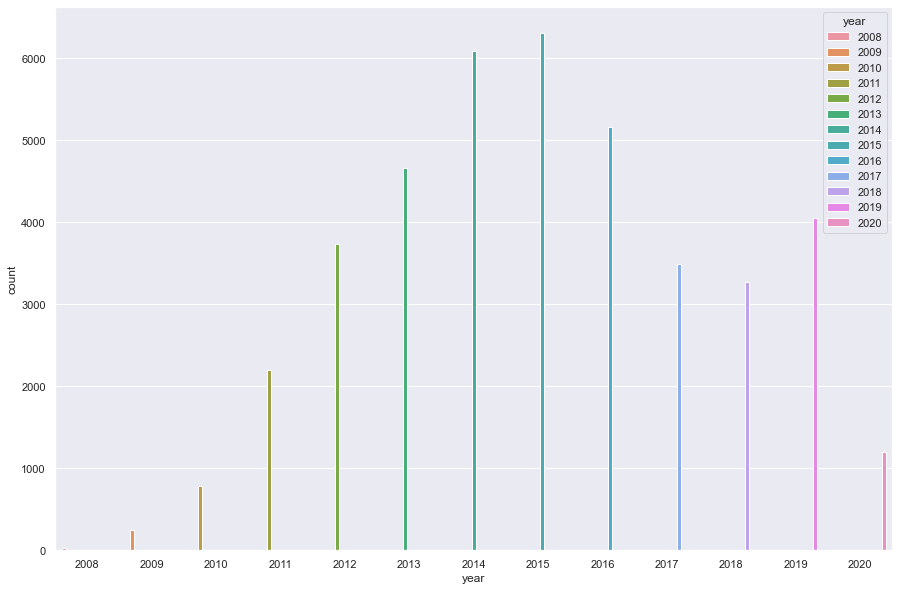

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'year', y = 'count',hue= 'year', data = demand)
 
# Show the plot

Sales over time of each item is a time-series. Time series is a collection of data points that are collected at constant time intervals.

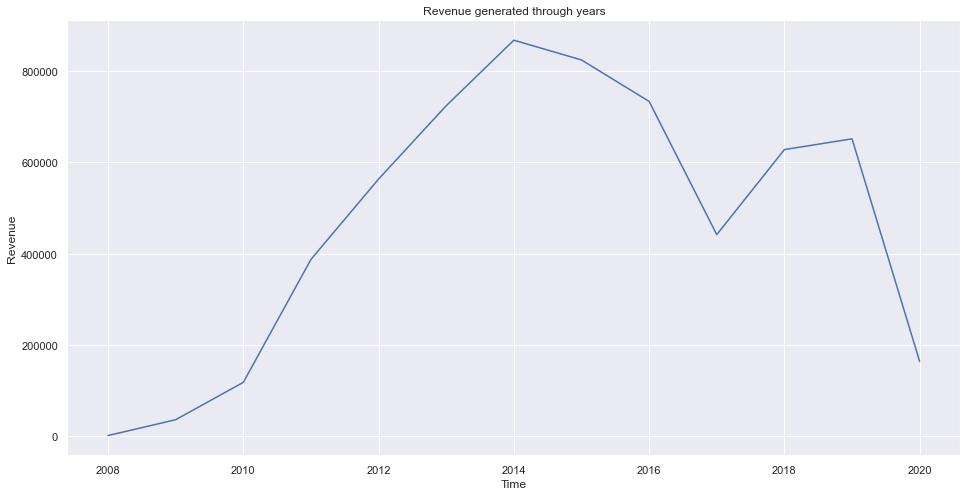

In [58]:
tss=seas.groupby(["year"])["price"].sum()
tss.astype('float')
plt.figure(figsize=(16,8))
plt.title('Revenue generated through years')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.plot(tss);

There is an exponential growth in revenue and demand since 2015 and had a drop in year 2017 and 2020.
It can be visualize from the image that as demand (Number of listing increases), prices (Revenue increases)

*This means time series data has seasonality variation.

There is three basic criteria to check whether the time series data is stationary series or not.

 :If mean doesn't changes with time.
 :Variance of a series should not be a function of time.
 :Autocovariance that does not depend on time. Autocovariance is covariance between time series and lagged time series.

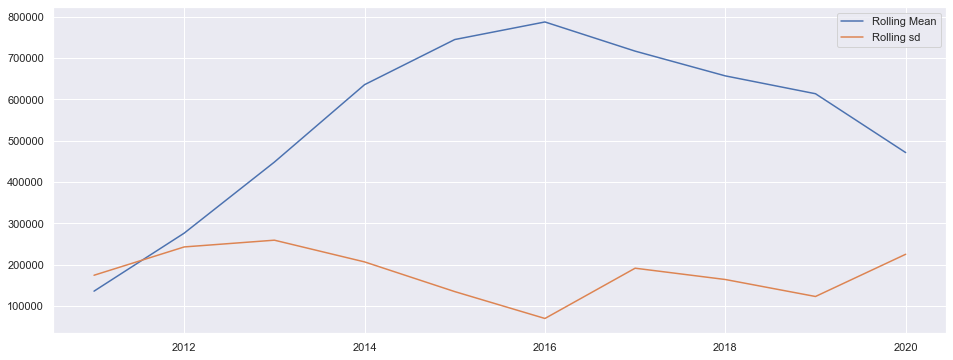

In [59]:
plt.figure(figsize=(16,6))
plt.plot(tss.rolling(window=4,center=False).mean(),label='Rolling Mean');
plt.plot(tss.rolling(window=4,center=False).std(),label='Rolling sd');
plt.legend();

According to above figure it is seen that data has seasonal variation.

Checking a quick decomposition into Trend, seasonality and residuals.

 :Level: The average value in the series.
 :Trend: The increasing or decreasing value in the series.
 :Seasonality: The repeating short-term cycle in the series. *decompositon has - level, trends and seasonality

## Multiplicative is a non linear model and it increases and decreases over the time.

<ipython-input-60-0508330f230e>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(tss.values,freq=4,model="multiplicative")


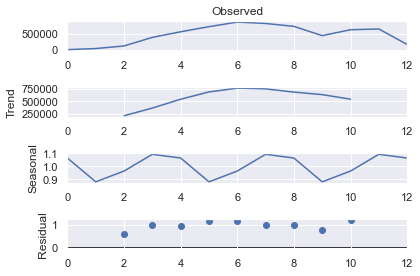

In [60]:
import statsmodels.api as sm
# multiplicative is a non linear model and it increases and decreases over the time. 
res = sm.tsa.seasonal_decompose(tss.values,freq=4,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()
#A nonlinear trend is a curved line.

## Additive is a linear model and it does not increases and decreases over the time.

<ipython-input-61-ad7507b9cef6>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(tss.values,freq=4,model="additive")


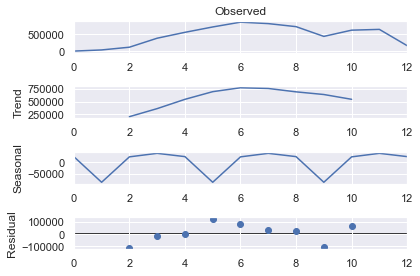

In [61]:
import statsmodels.api as sm
# additive is a linear model and it does not increases and decreases over the time. 
res = sm.tsa.seasonal_decompose(tss.values,freq=4,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()
#A linear trend should be straight line.

# Forecasting using ARIMA

ARIMA models are easier to model if data is stationary.

To check the stationarity of time series data, ADF(Augmented Dicky Fuller) test is performed.

  :The ADF test comprises of a Test Statistic, p value and 3 Critical Values for difference confidence levels.
  
Data is said to be stationary if:-

  :P-value should be less than alpha value 0.05 (to reject the null hypothesis(H0), i.e the data does not have a unit root and      is stationary.
  :If t-statistic is less than the critical value, we can say that time series is stationary.

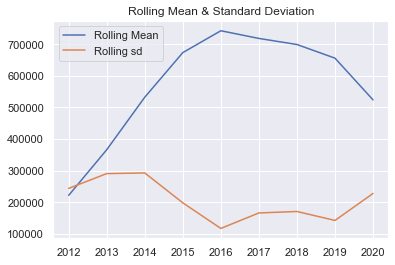

Results of Dickey-Fuller Test:
Test Statistic                -2.557238
p-value                        0.102161
#Lags Used                     4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64
None


In [62]:
from statsmodels.tsa.stattools import adfuller

def stationarycheck(timeseries):   
    plt.plot(timeseries.rolling(window=5,center=False).mean(),label='Rolling Mean');
    plt.plot(timeseries.rolling(window=5,center=False).std(),label='Rolling sd');

    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
print(stationarycheck(tss))

## rolling mean

In [63]:
moving_avg= tss.rolling(window=4).mean()

In [64]:
ts_moving_avg_diff = tss - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 4 is nan value due to window size\

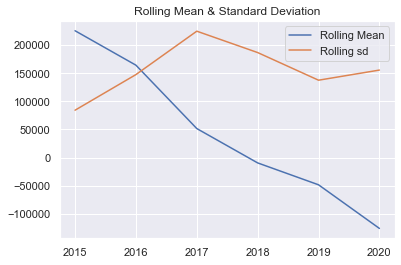

Results of Dickey-Fuller Test:
Test Statistic                -0.757273
p-value                        0.831352
#Lags Used                     0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64
None


In [65]:
print(stationarycheck(ts_moving_avg_diff))

## Differencing Method

In [66]:
ts_diff = tss - tss.shift()
ts_diff.dropna(inplace=True)

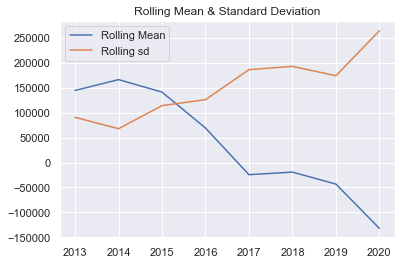

Results of Dickey-Fuller Test:
Test Statistic                 -1.453820
p-value                         0.556220
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
None


In [67]:
print(stationarycheck(ts_diff))

# Arima is Auto-Regressive Integrated Moving Averages

  :AR (Auto Regressive) p: Specifies that the evolving variable regresses at its own prior(lag) values.
  :I (Integrated) d :It indicates the number of nonseasonal differences i.e data values are replaced with the difference between    their values and the previous values.
  :MA(Moving average) q: MA terms are lagged forecast errors in prediction equation.
  
ARIMA

ACF(Auto-correlation factor) and PACF(Partial auto-correlation factor)


(p,d,q) are the parameters of ARIMA model.

To choose p,d,q we will plot two different plots ACF(Auto-Correlation Factor) and PACF(Partial Auto-Correlation Factor)
  :ACF -The coefficient of correlation between two values in a time series is called the autocorrelation function.
  :PACF -Describes the direct relationship between an observation and its lag. This would suggest that there would be no            correlation for lag values beyond k

C:\Users\AVSMo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


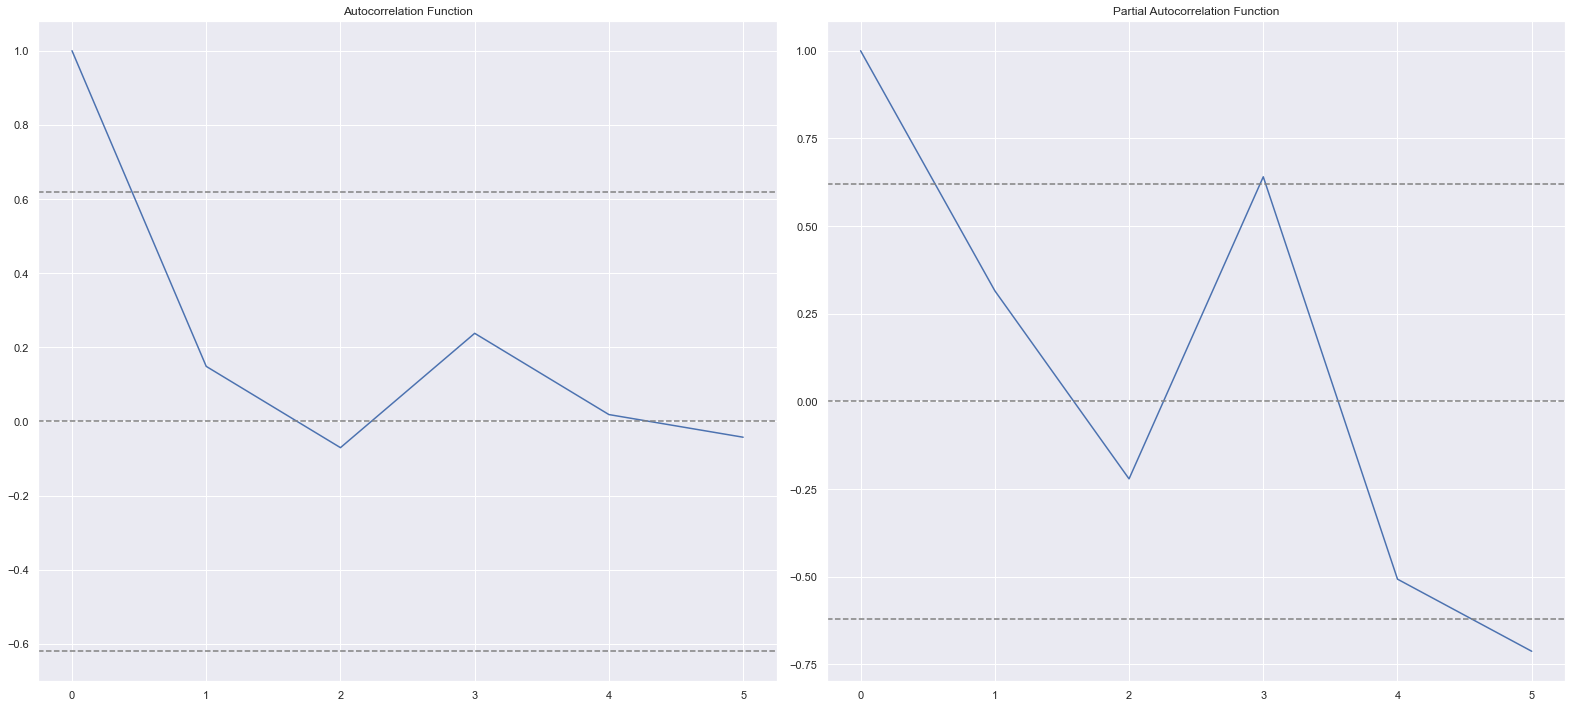

In [68]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=5)
lag_pacf = pacf(ts_diff, nlags=5, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## Modelling data using ARIMA

In [69]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
# fit model
model2 = ARIMA(tss, order=(0,0,1)) 
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()

C:\Users\AVSMo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


## Perdicted vs original data Graph

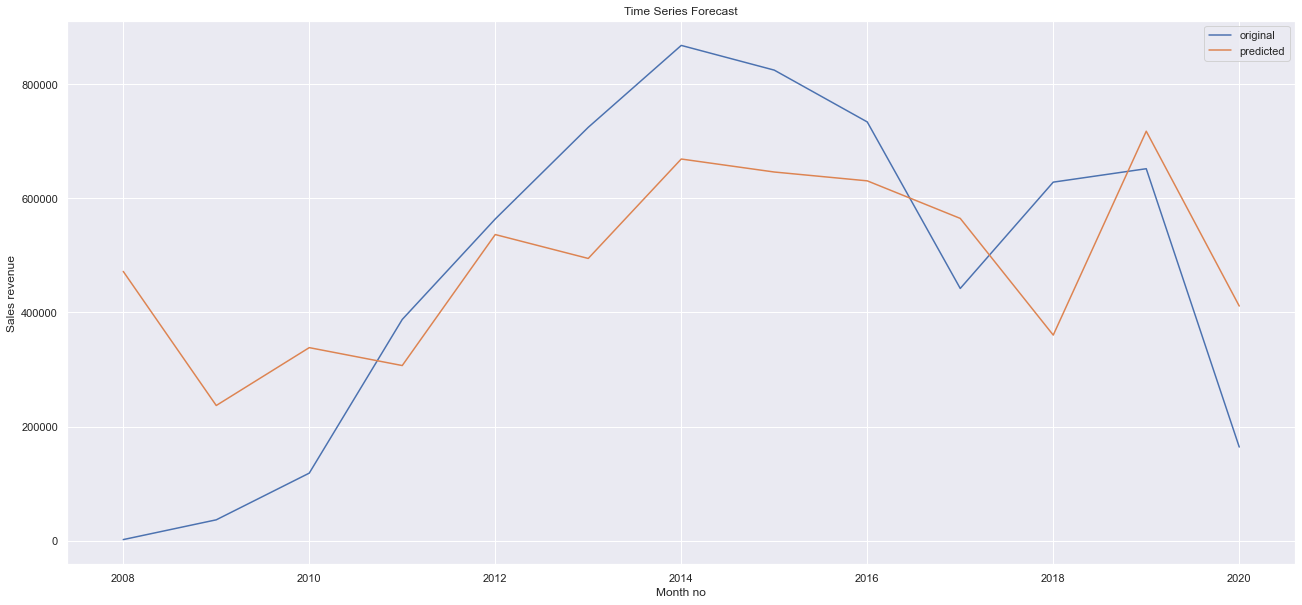

In [70]:
plt.figure(figsize=(22,10))
plt.plot(tss,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Month no")
plt.ylabel("Sales revenue")
plt.legend()
plt.savefig('graphsmall.png')

plt.show()

## Caluculating error using mean square error

In [71]:
error = mean_squared_error(tss, forecast2)
rmse = sqrt(error)

print("error: " ,error)
print("RMSE: ",rmse)
#MAPE
num= abs(forecast2-tss).sum()
d= abs(tss).sum()

mape = (num/d)*100
print('MAPE: %3f' %mape)

error:  46442727292.87404
RMSE:  215505.74770264025
MAPE: 39.255459


## Accuracy

In [72]:
Accuracy = 100-mape

In [73]:
Accuracy

60.74454118240984